/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DummyClassifier: Accuracy = 0.1669, Precision = 0.0278, Recall = 0.1669, F1-score = 0.0477


/home/ndo/miniconda3/envs/notebook/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GaussianNB: Accuracy = 0.1669, Precision = 0.0278, Recall = 0.1669, F1-score = 0.0477
LogisticRegression: Accuracy = 0.2342, Precision = 0.7215, Recall = 0.2342, F1-score = 0.1972


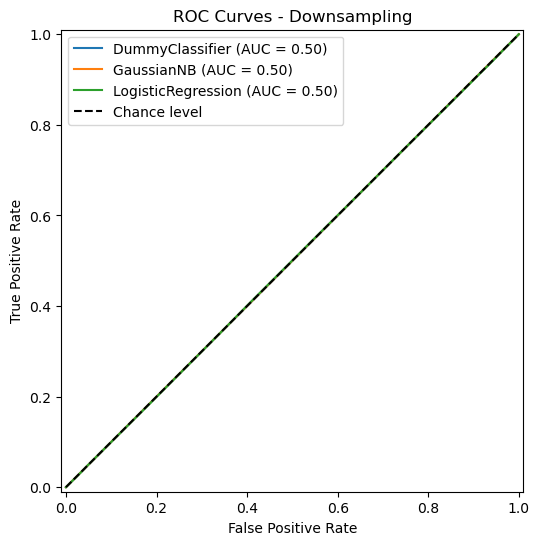

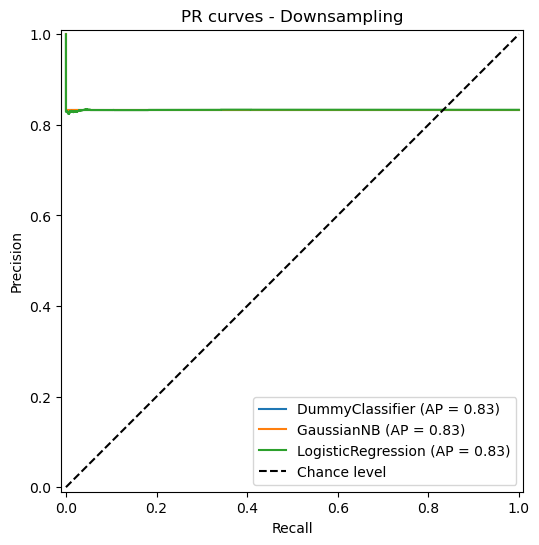

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, PrecisionRecallDisplay

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['GaussianNB','DummyClassifier', 'LogisticRegression']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_scaled_dataset.parquet')

df.dropna(subset=['labels'], inplace=True)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels

excluded_names = ['KNeighborsClassifier','NearestCentroid' ]
results = {}

# Loop through each classifier and evaluate
for name, model in models.items():
    if name in names:
        try:  
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            acc = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            # Store results
            results[name] = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

            # Print metrics
            print(f"{name}: Accuracy = {acc:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-score = {f1:.4f}")
            

        except Exception as e:
            print(f"Failed to run {name}: {e}")

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    if model_name in names:
        model = models[model_name]
        PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves - Downsampling')
plt.legend()
plt.show()


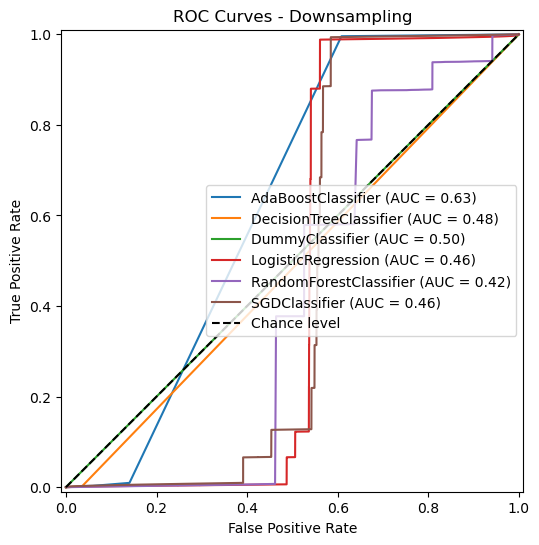

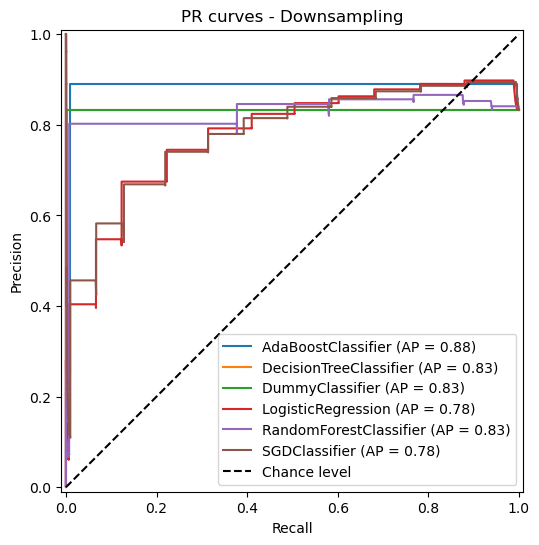

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['AdaBoostClassifier','DummyClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SGDClassifier', 'DecisionTreeClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    if model_name in names:
        model = models[model_name]
        PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves - Downsampling')
plt.legend()
plt.show()


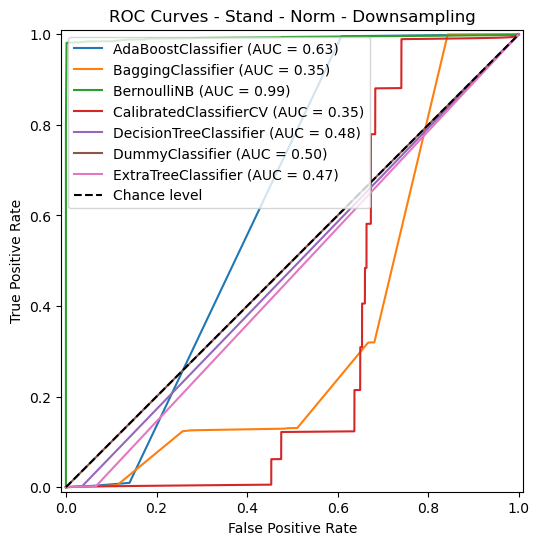

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', ]
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Stand - Norm - Downsampling')
plt.legend()
plt.show()

# from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# for model_name in models.keys():
#     if model_name in names:
#         model = models[model_name]
#         PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

# plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('PR curves - Downsampling')
# plt.legend()
# plt.show()

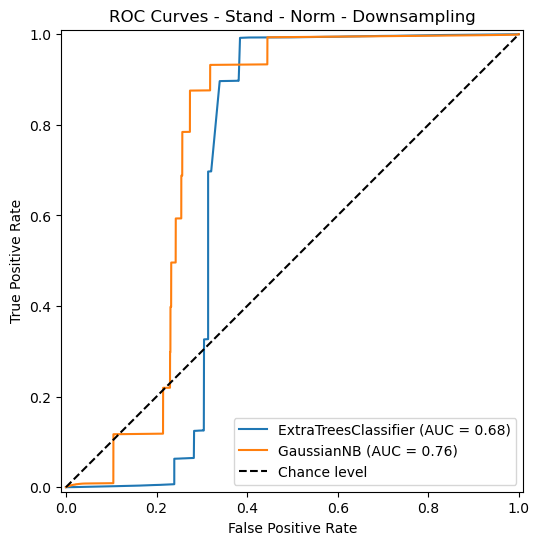

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['ExtraTreesClassifier', 'GaussianNB']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Stand - Norm - Downsampling')
plt.legend()
plt.show()


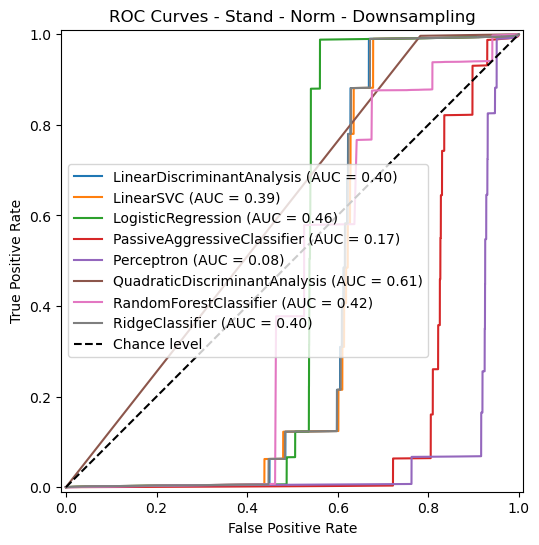

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

# names = ['KNeighborsClassifier','NearestCentroid' ]
names = ['LinearDiscriminantAnalysis','LinearSVC','LogisticRegression', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Stand - Norm - Downsampling')
plt.legend()
plt.show()


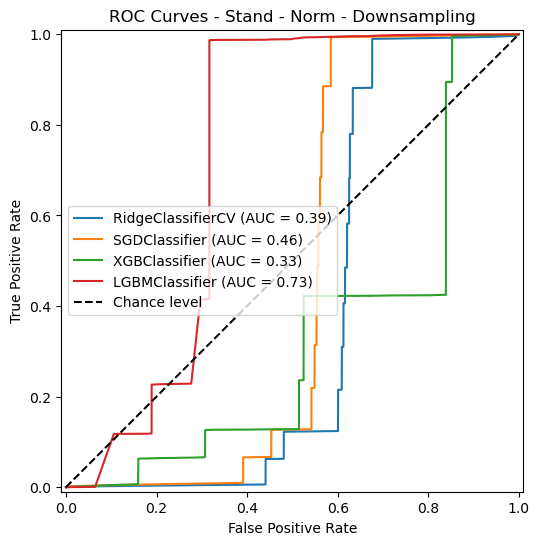

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

# names = ['KNeighborsClassifier','NearestCentroid' ]
names = ['RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Stand - Norm - Downsampling')
plt.legend()
plt.show()

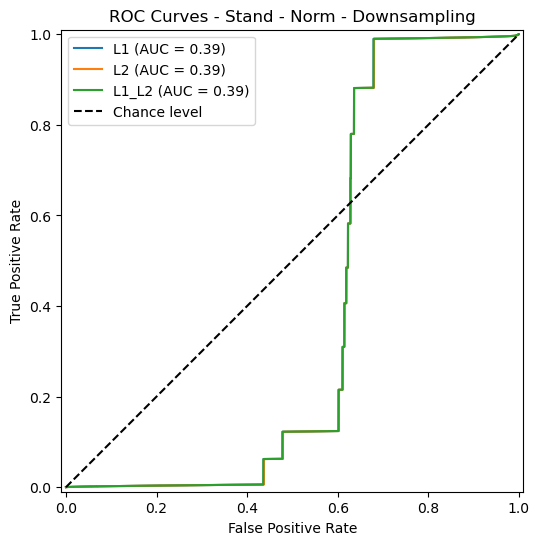

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

# names = ['KNeighborsClassifier','NearestCentroid' ]
names = ['RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/LR_downsam_stand_norm_L1_L2.pkl'
models = load_model(model_filename)

# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Stand - Norm - Downsampling')
plt.legend()
plt.show()

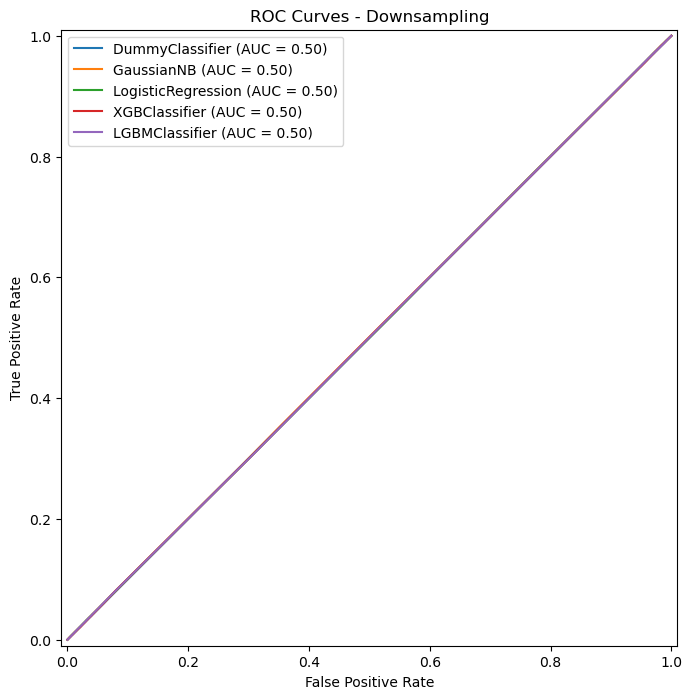

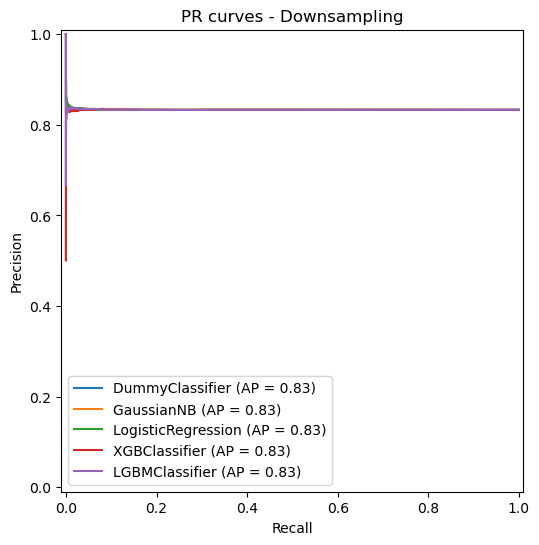

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'QuadraticDiscriminantAnalysis', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'QuadraticDiscriminantAnalysis', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['GaussianNB','DummyClassifier', 'LogisticRegression', 'LGBMClassifier',
         'XGBClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)
# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_scaled_dataset.parquet')
df.dropna(subset=['labels'], inplace=True)
# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    if model_name in names:
        model = models[model_name]
        PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves - Downsampling')
plt.legend()
plt.show()


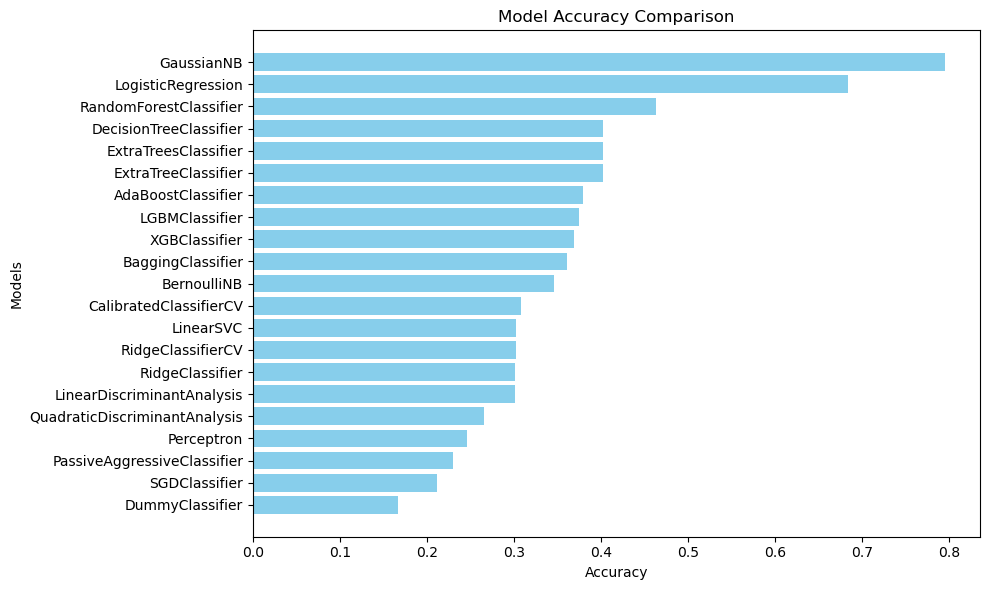

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file path
file_path = '/home/ndo/vardict_ML/models_output/models_perf_stand_norm_19.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.sort_values(by='Accuracy', ascending=True)
# Plotting Accuracy comparison with models on y-axis
plt.figure(figsize=(10, 6))
plt.barh(df['Models'], df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')
plt.tight_layout()

# Show the plot
plt.show()



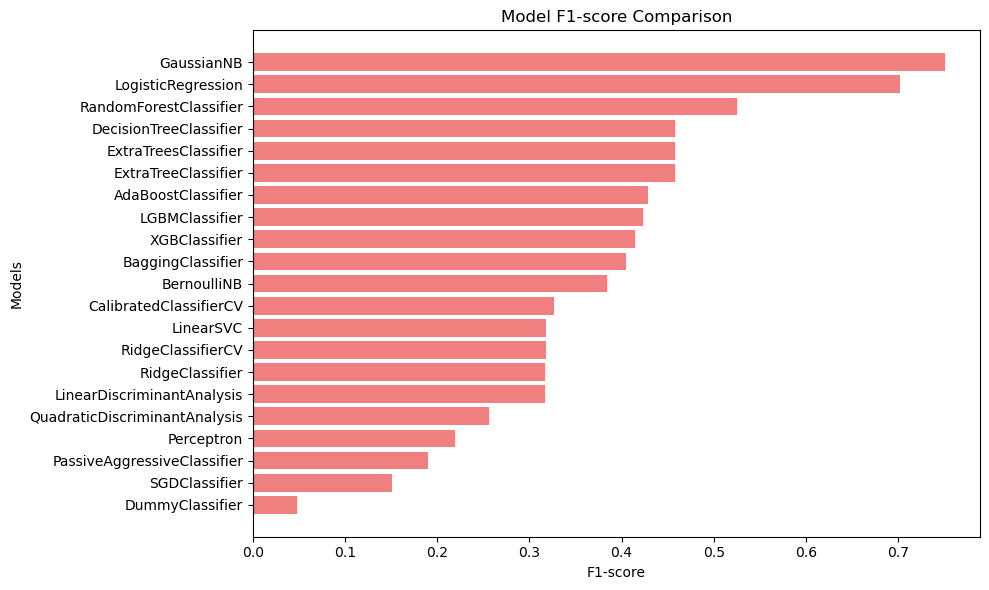

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file path
file_path = '/home/ndo/vardict_ML/models_output/models_perf_stand_norm_19.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.sort_values(by='F1-score', ascending=True)
# Plotting F1-score comparison with models on y-axis
plt.figure(figsize=(10, 6))
plt.barh(df['Models'], df['F1-score'], color='lightcoral')
plt.xlabel('F1-score')
plt.ylabel('Models')
plt.title('Model F1-score Comparison')
plt.tight_layout()

# Show the plot
plt.show()


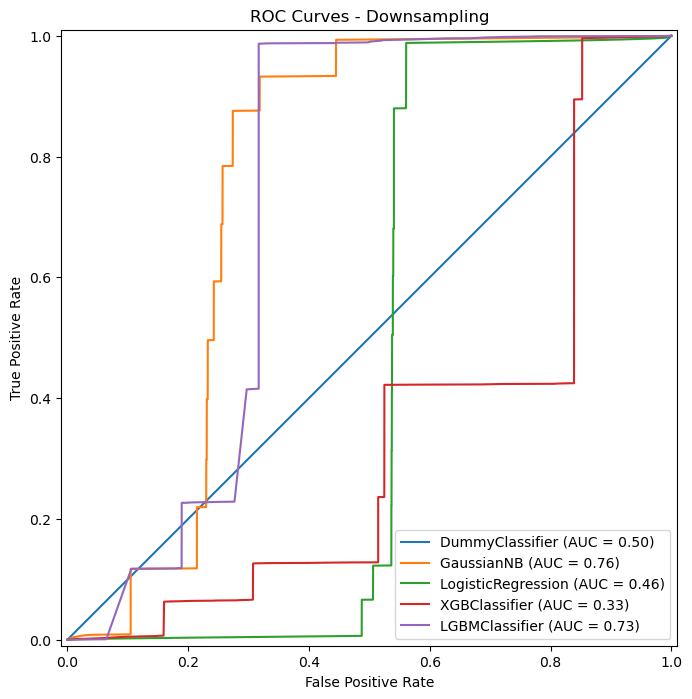

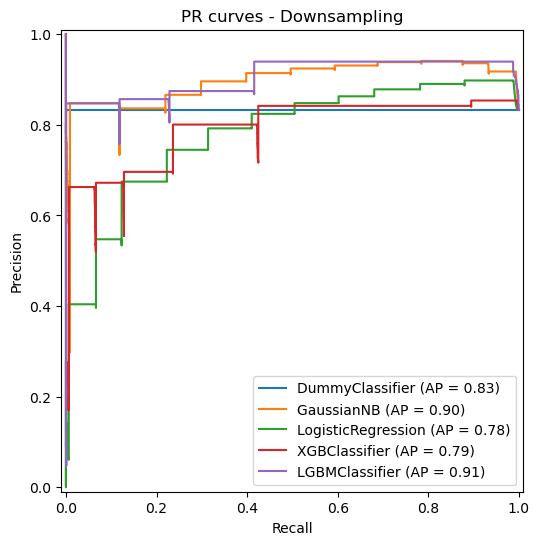

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'QuadraticDiscriminantAnalysis', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'QuadraticDiscriminantAnalysis', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['GaussianNB','DummyClassifier', 'LogisticRegression', 'LGBMClassifier',
         'XGBClassifier']
# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_stand_norm_downsampling_shuffle.pkl'
models = load_model(model_filename)
# Load test set:
df = pd.read_parquet('/home/ndo/vardict_ML/train_test_shuffle_data/test_dataset.parquet')
df.dropna(subset=['labels'], inplace=True)
# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels


from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for name, model in models.items():
    if name in names:
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    if model_name in names:
        model = models[model_name]
        PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves - Downsampling')
plt.legend()
plt.show()


In [3]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
# Replace this with the actual file path on your system
file_path = '/home/ndo/vardict_ML/models_output/three_features_results_norm_SRR106.txt'

# Initialize dictionaries to store feature counts and accuracies
feature_count = defaultdict(int)
feature_accuracy_sum = defaultdict(float)
threeFeatures_accuracy = {}
# Read the file and process each line
with open(file_path, 'r') as file:
    for line in file:
        # Extract the features and accuracy from each line
        parts = line.strip().split('), ')
        features = parts[0].replace("Features: ", "").replace("(", "").replace(")", "").replace("'", "").split(", ")
        accuracy = float(parts[1].replace("Accuracy: ", ""))
        tup_3_features = tuple(features)
        threeFeatures_accuracy[tup_3_features] = accuracy
        # Update count and accuracy sum for each feature
        for feature in features:
            feature_count[feature] += 1
            feature_accuracy_sum[feature] += accuracy

# Calculate average accuracy for each feature
feature_average_accuracy = {feature: feature_accuracy_sum[feature] / feature_count[feature] for feature in feature_count}

# Convert to DataFrame for display
feature_avg_df = pd.DataFrame.from_dict(feature_average_accuracy, orient='index', columns=['Average Accuracy'])
# Sort by 'Average Accuracy' in descending order
feature_avg_df_sorted = feature_avg_df.sort_values(by='Average Accuracy', ascending=True)

feature_3_acc_df = pd.DataFrame.from_dict(threeFeatures_accuracy, orient='index', columns=['Average Accuracy'])
# Display the results
# print(feature_avg_df_sorted)
feature_3_acc_df = feature_3_acc_df.sort_values(by='Average Accuracy', ascending=False)

<Figure size 1000x800 with 0 Axes>

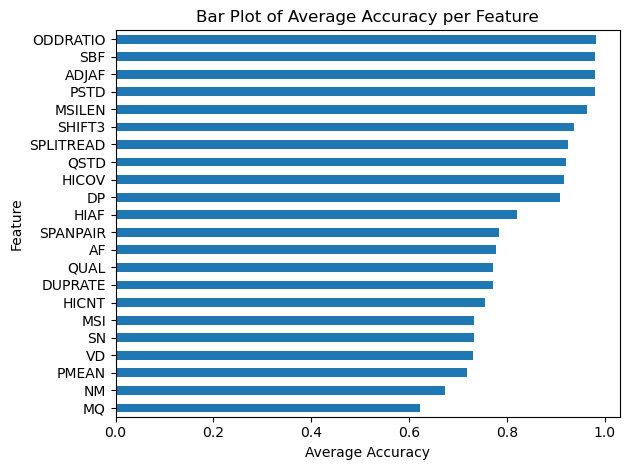

In [5]:
# Renaming index as 'Feature'
feature_avg_df_sorted = feature_avg_df_sorted.rename_axis("Feature")

# Creating a horizontal bar plot with y-axis as 'Feature'
plt.figure(figsize=(10, 8))
feature_avg_df_sorted.plot(kind='barh', y='Average Accuracy', legend=False)
plt.xlabel('Average Accuracy')
plt.ylabel('Feature')
plt.title('Bar Plot of Average Accuracy per Feature')
plt.tight_layout()

# Show the plot
plt.show()



In [40]:
feature_3_acc_df[:175]

,Average Accuracy
"(SBF, ODDRATIO, ADJAF)",0.963900
"(HIAF, DUPRATE, SPANPAIR)",0.949619
"(HIAF, SPLITREAD, SPANPAIR)",0.949619
"(AF, NM, SPANPAIR)",0.917013
"(HIAF, NM, SPANPAIR)",0.910793
...,...
"(QSTD, MSI, MSILEN)",0.803904
"(SBF, ADJAF, MSILEN)",0.405420
"(AF, SPLITREAD, SPANPAIR)",0.227895
"(AF, DUPRATE, SPANPAIR)",0.227895
